In [62]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import seaborn as sns

In [63]:
# open the parameters json
file_path = "model_parameters.json"
with open(file_path) as model_params:
    model_params = json.load(model_params)

models = list(model_params.keys())
# sorted(models)


#
#create df with all keys(ignoreing performance summary as it is nested)
#

base_dict = {}
final_dict = {}
ignore_list = 'performance_sumamry'
i=0;
for k in model_params:
    base_dict={}
    for k2 in model_params[k]:
        if k2 not in 'performance_summary':
            base_dict[k2]=model_params[k][k2]        
        final_dict[k]=base_dict

df = pd.DataFrame.from_dict(final_dict,orient='index')

#
#create a new df with the performance summary alone
#

psummary_dict = {}
for k in model_params:
    psummary_dict[k] = model_params[k]['performance_summary']

psummary_df = pd.DataFrame.from_dict(psummary_dict,orient='index')    

# join the 2 df's
final_df = df.join(psummary_df)

#select the cols with numeric values only to compare metrics ( so exclude features and weights )
summary_cols = [x for x in final_df.columns if x not in ['features','weights']]

#print and check the df
performance_df = final_df[summary_cols]
performance_df

,hidden_size,lr,dropout_rate,epochs,model_class,grid_search_metric,train_loss,val_loss,train_accuracy,test_accuracy,test_recall,test_f1_score,test_auc
OneLayer_100_epochs_optimized_roc_auc_score,500,0.0010,0.10,100,OneLayer,roc_auc_score,0.354343,0.367544,0.832215,0.804428,0.309091,0.390805,0.872475
TwoLayer_100_epochs_optimized_roc_auc_score,250,0.0100,0.15,100,TwoLayer,roc_auc_score,0.248668,0.401732,0.875839,0.815498,0.490909,0.519231,0.865236
ThreeLayer_100_epochs_optimized_f1_score,100,0.0100,0.15,100,ThreeLayer,f1_score,0.157190,0.804903,0.921980,0.830258,0.527273,0.557692,0.856566
OneLayer_250_epochs_optimized_roc_auc_score,100,0.0010,0.20,250,OneLayer,roc_auc_score,0.342610,0.351346,0.844799,0.841328,0.400000,0.505747,0.865488
TwoLayer_250_epochs_optimized_roc_auc_score,250,0.0001,0.05,250,TwoLayer,roc_auc_score,0.344960,0.366178,0.841443,0.804428,0.309091,0.390805,0.880051
ThreeLayer_250_epochs_optimized_roc_auc_score,100,0.0100,0.10,250,ThreeLayer,roc_auc_score,0.067083,1.157716,0.972315,0.863469,0.690909,0.672566,0.907449
OneLayer_500_epochs_optimized_roc_auc_score,10,0.0010,0.05,500,OneLayer,roc_auc_score,0.359272,0.368305,0.807047,0.797048,0.218182,0.303797,0.856650
TwoLayer_500_epochs_optimized_f1_score,500,0.0010,0.05,500,TwoLayer,f1_score,0.056451,0.901609,0.979866,0.859779,0.636364,0.648148,0.894360
ThreeLayer_500_epochs_optimized_roc_auc_score,500,0.0100,0.20,500,ThreeLayer,roc_auc_score,0.074468,2.119784,0.970638,0.859779,0.672727,0.660714,0.881818
OneLayer_750_epochs_optimized_roc_auc_score,500,0.0010,0.10,750,OneLayer,roc_auc_score,0.171815,0.423693,0.932886,0.845018,0.563636,0.596154,0.875842


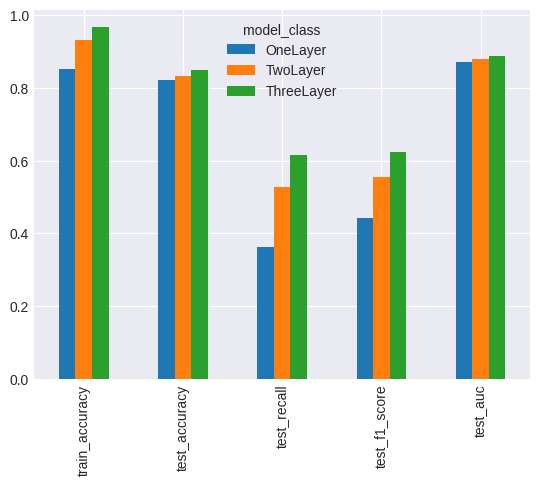

In [83]:
cols = [
    'model_class',
    'train_accuracy',
    'test_accuracy',
    'test_recall',
    'test_f1_score',
    'test_auc'
]

class_ordfer = ['OneLayer', 'TwoLayer', 'ThreeLayer']

class_avg = performance_df[cols].groupby(['model_class']).mean()
class_avg = class_avg.loc[class_order,:]
class_avg.T.plot(kind='bar');

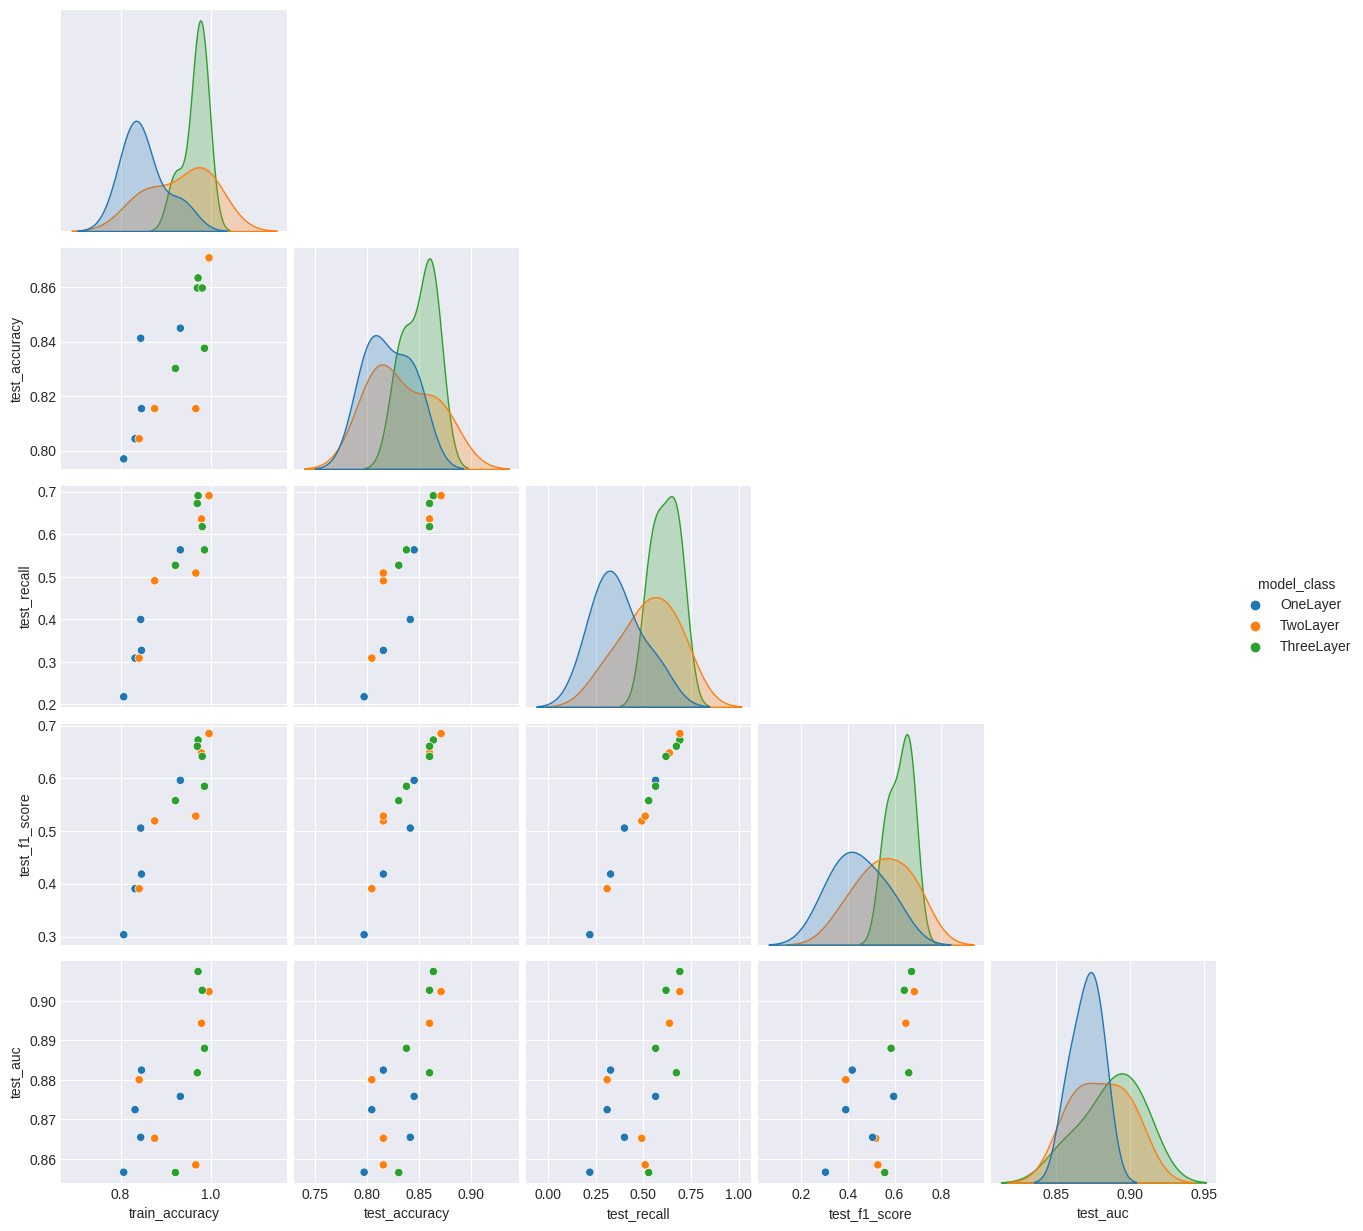

In [87]:
cols = [
    'model_class',
    'train_accuracy',
    'test_accuracy',
    'test_recall',
    'test_f1_score',
    'test_auc'
]

sns.pairplot(performance_df[cols], 
             hue='model_class', 
             hue_order=class_order,
             corner=True
            );

# view model predictions

In [3]:
import numpy as np
import pickle
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import torch
# load in the model class
import ModelNN as Net

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
torch.cuda.device_count()

4

In [5]:
device_0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device_1 = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device_2 = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
device_3 = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

devices = [
    device_0,
    device_1,
    device_2,
    device_3,
]

idx = 0
device = devices[idx]

In [6]:
# use whichever model name desired
architecture = 'TwoLayer_750_epochs_optimized_roc_auc_score'
one_model = model_params[architecture]
one_model

{'features': ['peak_i15_mmh',
  'SuscFrac',
  'Extinction moisture content',
  'fire_interval',
  'kf',
  'prophm23',
  'dnbr1000',
  'SAV',
  'SedUn',
  'Packing ratio',
  'Fine fuel load',
  'LNDS_RISKS'],
 'hidden_size': 250,
 'lr': 0.01,
 'dropout_rate': 0.05,
 'epochs': 750,
 'model_class': 'TwoLayer',
 'weights': 'TwoLayer_750_epochs_optimized_roc_auc_score.pth',
 'grid_search_metric': 'roc_auc_score',
 'performance_summary': {'train_loss': 0.010291540063917637,
  'val_loss': 2.6195764541625977,
  'train_accuracy': 0.9966442953020134,
  'test_accuracy': 0.8708487084870848,
  'test_recall': 0.6909090909090909,
  'test_f1_score': 0.6846846846846847,
  'test_auc': 0.9023569023569024}}

In [7]:
# should turn this into a function


input_size = len(one_model['features'])
hidden_size = one_model['hidden_size']
dropout_rate = one_model['dropout_rate']
output_size = 1


# this is not programmatic
# it isn't getting passed in
model_class = one_model['model_class']
features = one_model['features']
# load trained model weights
weights = one_model['weights']


# instantiate model
model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate).to(device)

# load weights
model.load_state_dict(torch.load(weights))

<All keys matched successfully>

In [8]:
# LOAD IN DATA
X_train_df, X_test_df, y_train_df, y_test_df = pickle.load(open("../data/train_test_data.pkl", "rb"))
X_train_df, X_test_df = X_train_df[features], X_test_df[features]

# scale on the training set
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df))
X_test_scaled = pd.DataFrame(sc.transform(X_test_df))

# could also do the whole dataset
# want to examine just the test predictions now
X_test_tensor = torch.tensor(X_test_scaled.values).float().to(device)
y_test_pred_proba = model(X_test_tensor) # already sent to device when instantiated
y_test_pred_proba = y_test_pred_proba.detach().cpu().numpy().astype(np.float16) # smaller dtype
y_test_pred_bool = np.round(y_test_pred_proba)

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [10]:
# bring in full file
# will need for geographic assessment of confusion matrix
file_path = "../data/data_v08_consolidated.parquet"
df = gpd.read_parquet(file_path)

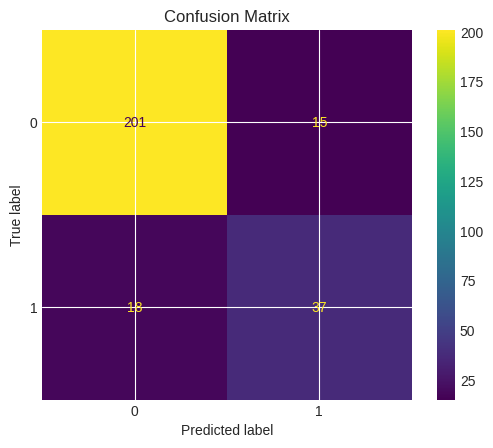

In [11]:
cm = confusion_matrix(y_test_df, y_test_pred_bool)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.title('Confusion Matrix');

In [27]:
# create dataframe with test values
test_assess = pd.DataFrame(y_test_df).astype(int).rename(columns={'response': 'y_test'})
# predicted values
test_assess['y_test_pred'] = y_test_pred_bool.flatten().astype(int)
# whether they are correctly predicted
test_assess['pred_correct'] = test_assess['y_test'] == test_assess['y_test_pred']
# the probability of the prediction
test_assess['y_test_pred_proba'] = y_test_pred_proba.flatten()

# precision of probas causing downstream errors
# truncate to something reasonable
test_assess['y_test_pred_proba'] = test_assess['y_test_pred_proba'].astype(str).str[:10].astype(np.float16)

# create column for confusion matrix
# we'll use this to assess the probabilities
# there's a dataframe for each of these if needed
TP = test_assess[(test_assess['y_test'] == 1) & (test_assess['pred_correct'] == True)]
FP = test_assess[(test_assess['y_test'] == 0) & (test_assess['pred_correct'] == False)]
TN = test_assess[(test_assess['y_test'] == 0) & (test_assess['pred_correct'] == True)]
FN = test_assess[(test_assess['y_test'] == 1) & (test_assess['pred_correct'] == False)]

test_assess.loc[TP.index,'confusion'] = 'TP'
test_assess.loc[FP.index,'confusion'] = 'FP'
test_assess.loc[TN.index,'confusion'] = 'TN'
test_assess.loc[FN.index,'confusion'] = 'FN'

# bring in the state values
test_assess = pd.merge(test_assess, df['state'], how='left', left_index=True, right_index=True)

test_assess

,y_test,y_test_pred,pred_correct,y_test_pred_proba,confusion,state
2,0,0,True,0.000000e+00,TN,CA
6,0,0,True,0.000000e+00,TN,CA
10,0,0,True,0.000000e+00,TN,CA
29,1,1,True,8.710938e-01,TP,ID
35,1,1,True,1.000000e+00,TP,ID
...,...,...,...,...,...,...
1446,0,0,True,0.000000e+00,TN,AZ
1447,0,0,True,0.000000e+00,TN,AZ
1448,0,0,True,5.960464e-08,TN,AZ
1449,0,0,True,0.000000e+00,TN,AZ


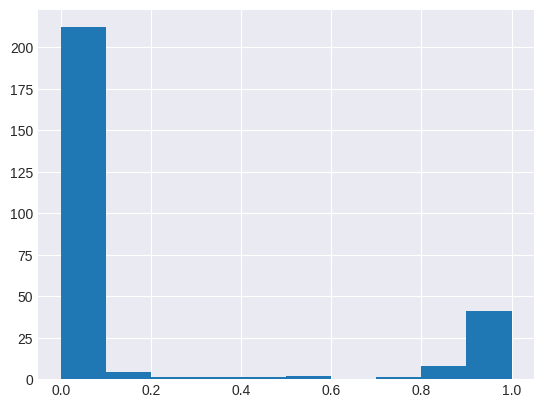

In [28]:
# overall probability distribution
test_assess['y_test_pred_proba'].hist();

In [29]:
test_assess.groupby(['confusion'])['y_test_pred_proba'].mean()

confusion
FN    0.042358
FP    0.944824
TN    0.006405
TP    0.957031
Name: y_test_pred_proba, dtype: float16

In [30]:
# records were there was actually YES debris flow
subset = ['TP', 'FN']
flows = test_assess[test_assess['confusion'].isin(subset)]

# records were there was actually NO debris flow
sub = ['TN', 'FP']
no_flows = test_assess[test_assess['confusion'].isin(sub)]

CPU times: user 381 ms, sys: 337 ms, total: 718 ms
Wall time: 313 ms


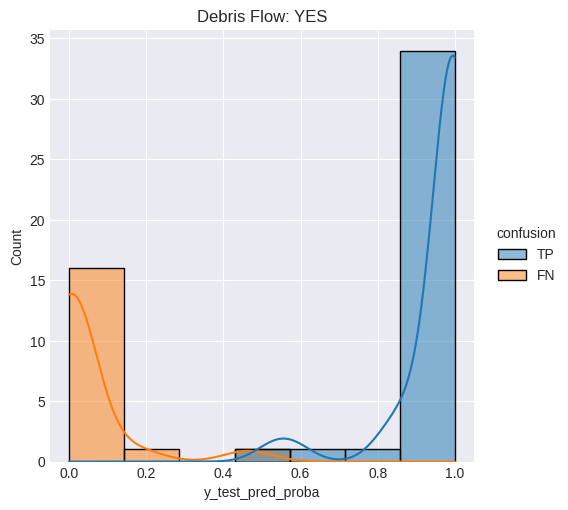

In [31]:
%%time
sns.displot(data=flows, x='y_test_pred_proba', hue='confusion', kde=True);
plt.title('Debris Flow: YES');

something about the `no_flows` is really slowing up the system
- plot not working (or at least intermittant)
- warning about index being out of bounds
- there must be a really small number in there
    - truncate values?

In [49]:
temp['y_test_pred_proba'].astype(str).str[:8].astype(np.float16).astype(str).str.len().value_counts().sort_index()

3    166
5     12
6     10
7     17
8     11
Name: y_test_pred_proba, dtype: int64

In [55]:
no_flows[no_flows['y_test_pred_proba'].astype(str).str.len() < 7]

,y_test,y_test_pred,pred_correct,y_test_pred_proba,confusion,state
2,0,0,True,0.000000e+00,TN,CA
6,0,0,True,0.000000e+00,TN,CA
10,0,0,True,0.000000e+00,TN,CA
36,0,0,True,6.301880e-03,TN,ID
44,0,0,True,0.000000e+00,TN,CA
...,...,...,...,...,...,...
1446,0,0,True,0.000000e+00,TN,AZ
1447,0,0,True,0.000000e+00,TN,AZ
1448,0,0,True,5.960464e-08,TN,AZ
1449,0,0,True,0.000000e+00,TN,AZ


CPU times: user 374 ms, sys: 340 ms, total: 715 ms
Wall time: 319 ms


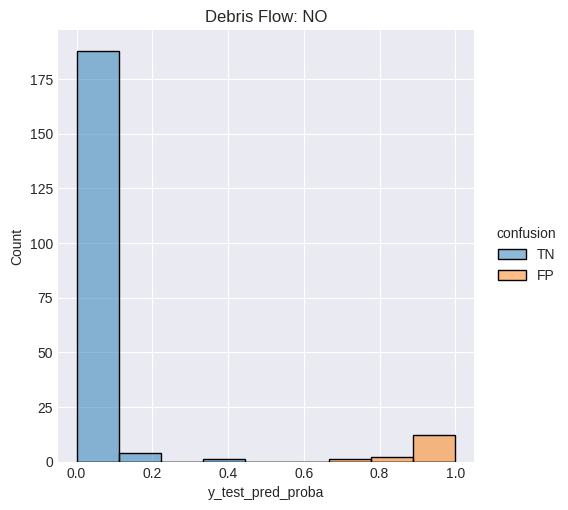

In [88]:
%%time
# this works sometimes???
# temp = no_flows.copy().reset_index(drop=True)
# temp['y_test_pred_proba'] = temp['y_test_pred_proba'].astype(str).str[:8].astype(np.float16)

# this works
temp = no_flows[no_flows['y_test_pred_proba'].astype(str).str.len() < 9] # up to 8 in length

sns.displot(data=temp, x='y_test_pred_proba', hue='confusion', kde=False);
plt.title('Debris Flow: NO');

In [24]:
# this let's us see where are performance is coming from
# it's the percentage of each metric by state
state_matrix = test_assess.groupby(['confusion'])['state'].value_counts(normalize=True).unstack().fillna(0)#.astype(int)
state_matrix = state_matrix.loc[['TP', 'FN', 'TN', 'FP'],:]
state_matrix

state,AZ,CA,CO,ID,MT,NM
confusion,,,,,,
TP,0.000000,0.783784,0.108108,0.027027,0.027027,0.054054
FN,0.166667,0.666667,0.055556,0.055556,0.055556,0.000000
TN,0.120603,0.517588,0.326633,0.005025,0.010050,0.020101
FP,0.176471,0.294118,0.176471,0.000000,0.235294,0.117647


In [25]:
# we can use this to determine
# is our confusion matrix is overindexing on certain state(s)?
state_counts = test_assess['state'].value_counts(normalize=True).sort_index()
state_counts

AZ    0.110701
CA    0.549815
CO    0.269373
ID    0.011070
MT    0.029520
NM    0.029520
Name: state, dtype: float64

In [26]:
confusion_index = state_matrix.div(state_counts) - 1
confusion_index

state,AZ,CA,CO,ID,MT,NM
confusion,,,,,,
TP,-1.000000,0.425540,-0.598667,1.441441,-0.084459,0.831081
FN,0.505556,0.212528,-0.793760,4.018519,0.881944,-1.000000
TN,0.089447,-0.058615,0.212570,-0.546064,-0.659548,-0.319095
FP,0.594118,-0.465061,-0.344883,-1.000000,6.970588,2.985294


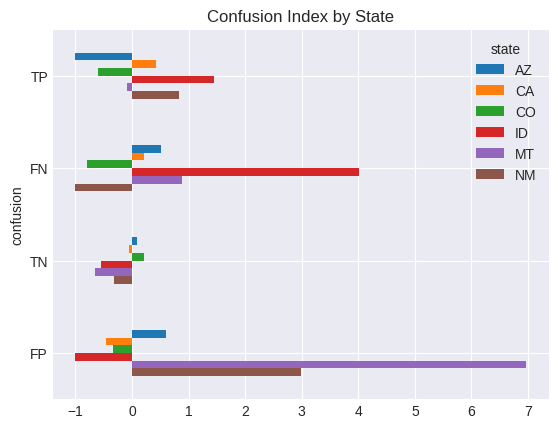

In [27]:
confusion_index.plot(kind='barh').invert_yaxis();
plt.title('Confusion Index by State');

In [89]:
features

['peak_i15_mmh',
 'SuscFrac',
 'Extinction moisture content',
 'fire_interval',
 'kf',
 'prophm23',
 'dnbr1000',
 'SAV',
 'SedUn',
 'Packing ratio',
 'Fine fuel load',
 'LNDS_RISKS']